In [1]:
import pandas as pd
import numpy as np
import gensim
import seaborn as sns
import matplotlib.pyplot as plt
from gensim.parsing.preprocessing import preprocess_documents


df_5comp_MW = pd.read_csv('New_training_set_allsources_postNER.csv', sep=';')
df_5comp_MW_corpus = pd.read_csv('corpus_training_set.csv', sep=';')

text_corpus = df_5comp_MW['Text'].values
training_corpus = df_5comp_MW_corpus['Text'].values


for i in list(range(0,df_5comp_MW.shape[0])):
        text_corpus[i]=text_corpus[i][0:300]


for i in list(range(0,df_5comp_MW_corpus.shape[0])):
        training_corpus[i]=training_corpus[i][0:300]
        

#print(df_5comp_MW.shape)
print(df_5comp_MW_corpus.shape)

df_5comp_MW.dropna(inplace = True)
df_5comp_MW_corpus.dropna(inplace = True)

print(df_5comp_MW.shape)
#print(df_5comp_MW.head())
print(df_5comp_MW_corpus.shape)
#print(df_5comp_MW_corpus.head())

C:\Users\Arnau\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


(44, 5)
(1919, 5)
(44, 5)


Category 1: Stock Price Update

Category 2: Deals Partnerships and M&A

Category 3: Legal

Category 4: Product

Category 5: Analyst Recommendation

Category 6: Employment

Category 7: Facilities

Category 8: Award

Category 9: Financial

Category 10: Other


In [2]:
df_5comp_MW_1 = df_5comp_MW.loc[df_5comp_MW['Category'] == 1]
df_5comp_MW_2 = df_5comp_MW.loc[df_5comp_MW['Category'] == 2]
df_5comp_MW_3 = df_5comp_MW.loc[df_5comp_MW['Category'] == 3]
df_5comp_MW_4 = df_5comp_MW.loc[df_5comp_MW['Category'] == 4]
df_5comp_MW_5 = df_5comp_MW.loc[df_5comp_MW['Category'] == 5]
df_5comp_MW_6 = df_5comp_MW.loc[df_5comp_MW['Category'] == 6]
df_5comp_MW_7 = df_5comp_MW.loc[df_5comp_MW['Category'] == 7]
df_5comp_MW_8 = df_5comp_MW.loc[df_5comp_MW['Category'] == 8]
df_5comp_MW_9 = df_5comp_MW.loc[df_5comp_MW['Category'] == 9]
df_5comp_MW_10 = df_5comp_MW.loc[df_5comp_MW['Category'] == 10]

df_5comp_MW_wo1 = df_5comp_MW.loc[df_5comp_MW['Category'] != 1]

print(df_5comp_MW_1.shape[0])
print(df_5comp_MW_9.shape[0])
print(df_5comp_MW_2.shape[0])
print(df_5comp_MW_3.shape[0])
print(df_5comp_MW_4.shape[0])
print(df_5comp_MW_5.shape[0])
print(df_5comp_MW_6.shape[0])
print(df_5comp_MW_7.shape[0])
print(df_5comp_MW_8.shape[0])


1430
168
76
72
61
64
26
12
10


In [3]:
df_5comp_MW_1_corpus = df_5comp_MW_corpus.loc[df_5comp_MW_corpus['Category'] == 1]
df_5comp_MW_2_corpus = df_5comp_MW_corpus.loc[df_5comp_MW_corpus['Category'] == 2]
df_5comp_MW_3_corpus = df_5comp_MW_corpus.loc[df_5comp_MW_corpus['Category'] == 3]
df_5comp_MW_4_corpus = df_5comp_MW_corpus.loc[df_5comp_MW_corpus['Category'] == 4]
df_5comp_MW_5_corpus = df_5comp_MW_corpus.loc[df_5comp_MW_corpus['Category'] == 5]
df_5comp_MW_6_corpus = df_5comp_MW_corpus.loc[df_5comp_MW_corpus['Category'] == 6]
df_5comp_MW_7_corpus = df_5comp_MW_corpus.loc[df_5comp_MW_corpus['Category'] == 7]
df_5comp_MW_8_corpus = df_5comp_MW_corpus.loc[df_5comp_MW_corpus['Category'] == 8]
df_5comp_MW_9_corpus = df_5comp_MW_corpus.loc[df_5comp_MW_corpus['Category'] == 9]
df_5comp_MW_10_corpus = df_5comp_MW_corpus.loc[df_5comp_MW_corpus['Category'] == 10]

In [4]:
corpus_train_5comp_MW_lsi = {
    'Category': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], #'Stock Price Update', 'Deals/ M&A/ Partnerships', 'Lawsuits', 'Product', 'Analyst Recommendation', 'Employement', 'Facilities', 'Award', 'Financial (earnings etc.)', 'Other'],
    'Articles': [df_5comp_MW_1_corpus['Text'].iloc[1]+df_5comp_MW_1_corpus['Text'].iloc[2]+df_5comp_MW_1_corpus['Text'].iloc[3]+df_5comp_MW_1_corpus['Text'].iloc[4]+df_5comp_MW_1_corpus['Text'].iloc[0],
                 df_5comp_MW_2_corpus['Text'].iloc[1]+df_5comp_MW_2_corpus['Text'].iloc[2]+df_5comp_MW_2_corpus['Text'].iloc[3]+df_5comp_MW_2_corpus['Text'].iloc[4]+df_5comp_MW_2_corpus['Text'].iloc[0],
                 df_5comp_MW_3_corpus['Text'].iloc[1]+df_5comp_MW_3_corpus['Text'].iloc[2]+df_5comp_MW_3_corpus['Text'].iloc[3]+df_5comp_MW_3_corpus['Text'].iloc[4]+df_5comp_MW_3_corpus['Text'].iloc[0], 
                 df_5comp_MW_4_corpus['Text'].iloc[1]+df_5comp_MW_4_corpus['Text'].iloc[2]+df_5comp_MW_4_corpus['Text'].iloc[3]+df_5comp_MW_4_corpus['Text'].iloc[4]+df_5comp_MW_4_corpus['Text'].iloc[0], 
                 df_5comp_MW_5_corpus['Text'].iloc[1]+df_5comp_MW_5_corpus['Text'].iloc[2]+df_5comp_MW_5_corpus['Text'].iloc[3]+df_5comp_MW_5_corpus['Text'].iloc[4]+df_5comp_MW_5_corpus['Text'].iloc[0], 
                 df_5comp_MW_6_corpus['Text'].iloc[1]+df_5comp_MW_6_corpus['Text'].iloc[2]+df_5comp_MW_6_corpus['Text'].iloc[3]+df_5comp_MW_6_corpus['Text'].iloc[4]+df_5comp_MW_6_corpus['Text'].iloc[0], 
                 df_5comp_MW_7_corpus['Text'].iloc[1]+df_5comp_MW_7_corpus['Text'].iloc[2]+df_5comp_MW_7_corpus['Text'].iloc[3]+df_5comp_MW_7_corpus['Text'].iloc[4]+df_5comp_MW_7_corpus['Text'].iloc[0],
                 df_5comp_MW_8_corpus['Text'].iloc[1]+df_5comp_MW_8_corpus['Text'].iloc[2]+df_5comp_MW_8_corpus['Text'].iloc[3]+df_5comp_MW_8_corpus['Text'].iloc[0],
                 df_5comp_MW_9_corpus['Text'].iloc[1]+df_5comp_MW_9_corpus['Text'].iloc[2]+df_5comp_MW_9_corpus['Text'].iloc[3]+df_5comp_MW_9_corpus['Text'].iloc[4]+df_5comp_MW_9_corpus['Text'].iloc[0],
                 ""
                ]
}

corpus_df_5comp_MW_lsi = pd.DataFrame(corpus_train_5comp_MW_lsi, columns= ['Category','Articles'])

#print(corpus_df_5comp_MW_lsi)

In [5]:
text_corpus_5comp_MW_lsi = corpus_df_5comp_MW_lsi['Articles'].values

In [6]:
processed_corpus_5comp_MW_lsi = preprocess_documents(text_corpus_5comp_MW_lsi)
dictionary_5comp_MW_lsi = gensim.corpora.Dictionary(processed_corpus_5comp_MW_lsi)
bow_corpus_5comp_MW_lsi = [dictionary_5comp_MW_lsi.doc2bow(text) for text in processed_corpus_5comp_MW_lsi]

In [7]:
tfidf_5comp_MW_lsi = gensim.models.TfidfModel(bow_corpus_5comp_MW_lsi, smartirs="npu")
corpus_tfidf_5comp_MW_lsi = tfidf_5comp_MW_lsi[bow_corpus_5comp_MW_lsi]

(660, 9)


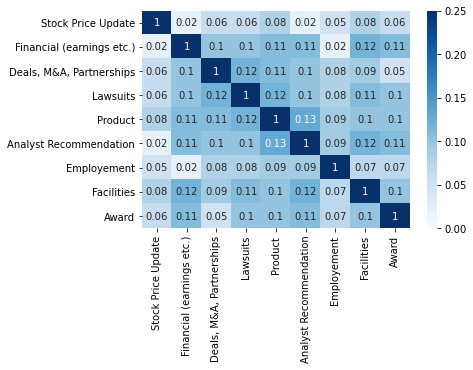

In [8]:
big_matrix=np.zeros((660,9))
print(big_matrix.shape)
c=0
for tuple_vector in corpus_tfidf_5comp_MW_lsi:
    
    #print(tuple_vector)
    #print("HELLOOOOOOOOO")
    for i in tuple_vector:
        #print(i[1])
        big_matrix[i[0],c]=i[1]
        
    c=c+1
    
    
#print(big_matrix.shape)
#print(big_matrix)

df_corr = pd.DataFrame (big_matrix, columns= ['Stock Price Update', 'Deals, M&A, Partnerships', 'Lawsuits', 'Product', 'Analyst Recommendation', 'Employement', 'Facilities', 'Award', 'Financial (earnings etc.)'])
df=df_corr[df_corr.columns[[0,8,1,2,3,4,5,6,7]]]
#print(df.head())

corr_matrix=df.corr().round(2)
plt.figure()
sns.heatmap(abs(corr_matrix), annot=True, vmax=0.25, vmin=0, cmap='Blues')
plt.show()


In [9]:
lsi_5comp_MW = gensim.models.LsiModel(corpus_tfidf_5comp_MW_lsi, num_topics=9)
index_5comp_MW_lsi = gensim.similarities.MatrixSimilarity(lsi_5comp_MW[corpus_tfidf_5comp_MW_lsi])

In [10]:
#print(df_5comp_MW_2["Text"].iloc[6])
new_doc_5comp_MW_lsi="lawsuit against apple for various reasons"

new_doc_5comp_MW_lsi = gensim.parsing.preprocessing.preprocess_string(new_doc_5comp_MW_lsi)
new_vec_5comp_MW_lsi = dictionary_5comp_MW_lsi.doc2bow(new_doc_5comp_MW_lsi)
vec_bow_tfidf_5comp_MW_lsi = tfidf_5comp_MW_lsi[new_vec_5comp_MW_lsi]
vec_5comp_MW_lsi = lsi_5comp_MW[vec_bow_tfidf_5comp_MW_lsi]
sims_5comp_MW_lsi = index_5comp_MW_lsi[vec_5comp_MW_lsi]
for s in sorted(enumerate(sims_5comp_MW_lsi), key=lambda item: -item[1])[:10]:
    print(f"{corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]} : {str(s[1])}")

3 : 0.99850017
4 : 7.450581e-09
5 : 4.656613e-09
7 : 0.0
10 : 0.0
1 : -2.3283064e-10
8 : -1.8626451e-09
2 : -2.7939677e-09
6 : -7.450581e-09
9 : -1.4901161e-08


In [13]:
#ACCURACY FOR ARTICLES CLASSIFICATION (ALL CATEGORIES)

total_articles = df_5comp_MW.shape[0]
print(total_articles-44)
correct=0
categories=[0,0,0,0,0,0,0,0,0]

for index, row in df_5comp_MW.iterrows():
    new_doc_5comp_MW_lsi = row['Text']
    correct_category = row['Category']

    new_doc_5comp_MW_lsi = gensim.parsing.preprocessing.preprocess_string(new_doc_5comp_MW_lsi)
    new_vec_5comp_MW_lsi = dictionary_5comp_MW_lsi.doc2bow(new_doc_5comp_MW_lsi)
    vec_bow_tfidf_5comp_MW_lsi = tfidf_5comp_MW_lsi[new_vec_5comp_MW_lsi]
    vec_5comp_MW_lsi = lsi_5comp_MW[vec_bow_tfidf_5comp_MW_lsi]
    sims_5comp_MW_lsi = index_5comp_MW_lsi[vec_5comp_MW_lsi]
        
    for s in sorted(enumerate(sims_5comp_MW_lsi), key=lambda item: -item[1])[:1]:
        categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]=categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]+1
        if corpus_df_5comp_MW_lsi['Category'].iloc[s[0]] == correct_category:
            #print("correct")
            correct=correct+1
        #else:
            #print(f"Correct category: {correct_category} and found category: {corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]} : {str(s[1])}")
print(categories)  
#the size of the corpus set is 44 articles, so for these we assume it will get them correctly with aprox. 100% of probability
print((correct-44)/(total_articles-44))
acc0=(correct-44)/(total_articles-44)

1875
[1408, 68, 54, 66, 61, 27, 27, 13, 195]
0.9114666666666666


In [12]:
#ACCURACY FOR ARTICLES CLASSIFICATION (without category 1 (stock price update))

total_articles = df_5comp_MW_wo1.shape[0]
print(total_articles-39)
correct=0
categories=[0,0,0,0,0,0,0,0,0]

for index, row in df_5comp_MW_wo1.iterrows():
    new_doc_5comp_MW_lsi = row['Text']
    correct_category = row['Category']

    new_doc_5comp_MW_lsi = gensim.parsing.preprocessing.preprocess_string(new_doc_5comp_MW_lsi)
    new_vec_5comp_MW_lsi = dictionary_5comp_MW_lsi.doc2bow(new_doc_5comp_MW_lsi)
    vec_bow_tfidf_5comp_MW_lsi = tfidf_5comp_MW_lsi[new_vec_5comp_MW_lsi]
    vec_5comp_MW_lsi = lsi_5comp_MW[vec_bow_tfidf_5comp_MW_lsi]
    sims_5comp_MW_lsi = index_5comp_MW_lsi[vec_5comp_MW_lsi]
        
    for s in sorted(enumerate(sims_5comp_MW_lsi), key=lambda item: -item[1])[:1]:
        categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]=categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]+1
        if corpus_df_5comp_MW_lsi['Category'].iloc[s[0]] == correct_category:
            #print("correct")
            correct=correct+1
        #else:
            #print(f"Correct category: {correct_category} and found category: {corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]} : {str(s[1])}")
            
print((correct-39)/(total_articles-39))

450
0.7111111111111111


In [15]:
#ACCURACY FOR ARTICLES CLASSIFICATION (category 1 (stock price update))

total_articles = df_5comp_MW_1.shape[0]
print(total_articles-5)
correct=0
categories=[-5,0,0,0,0,0,0,0,0]

for index, row in df_5comp_MW_1.iterrows():
    new_doc_5comp_MW_lsi = row['Text']
    correct_category = row['Category']

    new_doc_5comp_MW_lsi = gensim.parsing.preprocessing.preprocess_string(new_doc_5comp_MW_lsi)
    new_vec_5comp_MW_lsi = dictionary_5comp_MW_lsi.doc2bow(new_doc_5comp_MW_lsi)
    vec_bow_tfidf_5comp_MW_lsi = tfidf_5comp_MW_lsi[new_vec_5comp_MW_lsi]
    vec_5comp_MW_lsi = lsi_5comp_MW[vec_bow_tfidf_5comp_MW_lsi]
    sims_5comp_MW_lsi = index_5comp_MW_lsi[vec_5comp_MW_lsi]
        
    for s in sorted(enumerate(sims_5comp_MW_lsi), key=lambda item: -item[1])[:1]:
        categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]=categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]+1
        if corpus_df_5comp_MW_lsi['Category'].iloc[s[0]] == correct_category:
            #print("correct")
            correct=correct+1
        #else:
            #print(f"Correct category: {correct_category} and found category: {corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]} : {str(s[1])}")
            
print((correct-5)/(total_articles-5))
acc1=(correct-5)/(total_articles-5)
#print(categories)
print(np.divide(categories, total_articles-5))
print(sum(np.divide(categories, total_articles-5)))

1425
0.9747368421052631
[9.74736842e-01 7.01754386e-04 7.01754386e-04 2.10526316e-03
 4.21052632e-03 1.40350877e-03 0.00000000e+00 7.01754386e-04
 1.54385965e-02]
0.9999999999999998


In [16]:
#ACCURACY FOR ARTICLES CLASSIFICATION (category 9: Financial

total_articles = df_5comp_MW_9.shape[0]
print(total_articles-5)
correct=0
categories=[0,0,0,0,0,0,0,0,-5]

for index, row in df_5comp_MW_9.iterrows():
    new_doc_5comp_MW_lsi = row['Text']
    correct_category = row['Category']

    new_doc_5comp_MW_lsi = gensim.parsing.preprocessing.preprocess_string(new_doc_5comp_MW_lsi)
    new_vec_5comp_MW_lsi = dictionary_5comp_MW_lsi.doc2bow(new_doc_5comp_MW_lsi)
    vec_bow_tfidf_5comp_MW_lsi = tfidf_5comp_MW_lsi[new_vec_5comp_MW_lsi]
    vec_5comp_MW_lsi = lsi_5comp_MW[vec_bow_tfidf_5comp_MW_lsi]
    sims_5comp_MW_lsi = index_5comp_MW_lsi[vec_5comp_MW_lsi]
        
    for s in sorted(enumerate(sims_5comp_MW_lsi), key=lambda item: -item[1])[:1]:
        categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]=categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]+1
        if corpus_df_5comp_MW_lsi['Category'].iloc[s[0]] == correct_category:
            #print("correct")
            correct=correct+1
        #else:
            #print(f"Correct category: {correct_category} and found category: {corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]} : {str(s[1])}")
            
acc2=(correct-5)/(total_articles-5)
print((correct-5)/(total_articles-5))
print(np.divide(categories, total_articles-5))
print(sum(np.divide(categories, total_articles-5)))

163
0.852760736196319
[0.04294479 0.01840491 0.01226994 0.04294479 0.03067485 0.
 0.         0.         0.85276074]
1.0


In [17]:
#ACCURACY FOR ARTICLES CLASSIFICATION (category 2 (deals, pattnerships, M&A))

total_articles = df_5comp_MW_2.shape[0]
print(total_articles-5)
correct=0
categories=[0,-5,0,0,0,0,0,0,0]

for index, row in df_5comp_MW_2.iterrows():
    new_doc_5comp_MW_lsi = row['Text']
    correct_category = row['Category']

    new_doc_5comp_MW_lsi = gensim.parsing.preprocessing.preprocess_string(new_doc_5comp_MW_lsi)
    new_vec_5comp_MW_lsi = dictionary_5comp_MW_lsi.doc2bow(new_doc_5comp_MW_lsi)
    vec_bow_tfidf_5comp_MW_lsi = tfidf_5comp_MW_lsi[new_vec_5comp_MW_lsi]
    vec_5comp_MW_lsi = lsi_5comp_MW[vec_bow_tfidf_5comp_MW_lsi]
    sims_5comp_MW_lsi = index_5comp_MW_lsi[vec_5comp_MW_lsi]
        
    for s in sorted(enumerate(sims_5comp_MW_lsi), key=lambda item: -item[1])[:1]:
        categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]=categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]+1
        if corpus_df_5comp_MW_lsi['Category'].iloc[s[0]] == correct_category:
            #print("correct")
            correct=correct+1
        #else:
            #print(f"Correct category: {correct_category} and found category: {corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]} : {str(s[1])}")

acc3=(correct-5)/(total_articles-5)
print((correct-5)/(total_articles-5))
print(np.divide(categories, total_articles-5))
print(sum(np.divide(categories, total_articles-5)))

71
0.6619718309859155
[0.02816901 0.66197183 0.01408451 0.04225352 0.04225352 0.02816901
 0.14084507 0.         0.04225352]
0.9999999999999998


In [18]:
#ACCURACY FOR ARTICLES CLASSIFICATION (category 3 

total_articles = df_5comp_MW_3.shape[0]
print(total_articles-5)
correct=0
categories=[0,0,-5,0,0,0,0,0,0]

for index, row in df_5comp_MW_3.iterrows():
    new_doc_5comp_MW_lsi = row['Text']
    correct_category = row['Category']

    new_doc_5comp_MW_lsi = gensim.parsing.preprocessing.preprocess_string(new_doc_5comp_MW_lsi)
    new_vec_5comp_MW_lsi = dictionary_5comp_MW_lsi.doc2bow(new_doc_5comp_MW_lsi)
    vec_bow_tfidf_5comp_MW_lsi = tfidf_5comp_MW_lsi[new_vec_5comp_MW_lsi]
    vec_5comp_MW_lsi = lsi_5comp_MW[vec_bow_tfidf_5comp_MW_lsi]
    sims_5comp_MW_lsi = index_5comp_MW_lsi[vec_5comp_MW_lsi]
        
    for s in sorted(enumerate(sims_5comp_MW_lsi), key=lambda item: -item[1])[:1]:
        categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]=categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]+1
        if corpus_df_5comp_MW_lsi['Category'].iloc[s[0]] == correct_category:
            #print("correct")
            correct=correct+1
        #else:
            #print(f"Correct category: {correct_category} and found category: {corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]} : {str(s[1])}")
            
print((correct-5)/(total_articles-5))
acc4=(correct-5)/(total_articles-5)
print(np.divide(categories, total_articles-5))
print(sum(np.divide(categories, total_articles-5)))

67
0.6268656716417911
[0.01492537 0.04477612 0.62686567 0.08955224 0.05970149 0.05970149
 0.04477612 0.         0.05970149]
0.9999999999999999


In [19]:
#ACCURACY FOR ARTICLES CLASSIFICATION (category 4

total_articles = df_5comp_MW_4.shape[0]
print(total_articles-5)
correct=0
categories=[0,0,0,-5,0,0,0,0,0]

for index, row in df_5comp_MW_4.iterrows():
    new_doc_5comp_MW_lsi = row['Text']
    correct_category = row['Category']

    new_doc_5comp_MW_lsi = gensim.parsing.preprocessing.preprocess_string(new_doc_5comp_MW_lsi)
    new_vec_5comp_MW_lsi = dictionary_5comp_MW_lsi.doc2bow(new_doc_5comp_MW_lsi)
    vec_bow_tfidf_5comp_MW_lsi = tfidf_5comp_MW_lsi[new_vec_5comp_MW_lsi]
    vec_5comp_MW_lsi = lsi_5comp_MW[vec_bow_tfidf_5comp_MW_lsi]
    sims_5comp_MW_lsi = index_5comp_MW_lsi[vec_5comp_MW_lsi]
        
    for s in sorted(enumerate(sims_5comp_MW_lsi), key=lambda item: -item[1])[:1]:
        categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]=categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]+1
        if corpus_df_5comp_MW_lsi['Category'].iloc[s[0]] == correct_category:
            #print("correct")
            correct=correct+1
        #else:
            #print(f"Correct category: {correct_category} and found category: {corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]} : {str(s[1])}")
            
print((correct-5)/(total_articles-5))
acc5=(correct-5)/(total_articles-5)
print(np.divide(categories, total_articles-5))
print(sum(np.divide(categories, total_articles-5)))

56
0.6428571428571429
[0.03571429 0.08928571 0.03571429 0.64285714 0.05357143 0.01785714
 0.01785714 0.         0.10714286]
1.0000000000000002


In [20]:
#ACCURACY FOR ARTICLES CLASSIFICATION (category 5

total_articles = df_5comp_MW_5.shape[0]
print(total_articles-5)
correct=0
categories=[0,0,0,0,-5,0,0,0,0]

for index, row in df_5comp_MW_5.iterrows():
    new_doc_5comp_MW_lsi = row['Text']
    correct_category = row['Category']

    new_doc_5comp_MW_lsi = gensim.parsing.preprocessing.preprocess_string(new_doc_5comp_MW_lsi)
    new_vec_5comp_MW_lsi = dictionary_5comp_MW_lsi.doc2bow(new_doc_5comp_MW_lsi)
    vec_bow_tfidf_5comp_MW_lsi = tfidf_5comp_MW_lsi[new_vec_5comp_MW_lsi]
    vec_5comp_MW_lsi = lsi_5comp_MW[vec_bow_tfidf_5comp_MW_lsi]
    sims_5comp_MW_lsi = index_5comp_MW_lsi[vec_5comp_MW_lsi]
        
    for s in sorted(enumerate(sims_5comp_MW_lsi), key=lambda item: -item[1])[:1]:
        categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]=categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]+1
        if corpus_df_5comp_MW_lsi['Category'].iloc[s[0]] == correct_category:
            #print("correct")
            correct=correct+1
        #else:
            #print(f"Correct category: {correct_category} and found category: {corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]} : {str(s[1])}")
            
print((correct-5)/(total_articles-5))
acc6=(correct-5)/(total_articles-5)
print(np.divide(categories, total_articles-5))
print(sum(np.divide(categories, total_articles-5)))

59
0.5932203389830508
[0.03389831 0.03389831 0.01694915 0.06779661 0.59322034 0.03389831
 0.03389831 0.         0.18644068]
1.0


In [21]:
#ACCURACY FOR ARTICLES CLASSIFICATION (category 6

total_articles = df_5comp_MW_6.shape[0]
print(total_articles-5)
correct=0
categories=[0,0,0,0,0,-5,0,0,0]

for index, row in df_5comp_MW_6.iterrows():
    new_doc_5comp_MW_lsi = row['Text']
    correct_category = row['Category']

    new_doc_5comp_MW_lsi = gensim.parsing.preprocessing.preprocess_string(new_doc_5comp_MW_lsi)
    new_vec_5comp_MW_lsi = dictionary_5comp_MW_lsi.doc2bow(new_doc_5comp_MW_lsi)
    vec_bow_tfidf_5comp_MW_lsi = tfidf_5comp_MW_lsi[new_vec_5comp_MW_lsi]
    vec_5comp_MW_lsi = lsi_5comp_MW[vec_bow_tfidf_5comp_MW_lsi]
    sims_5comp_MW_lsi = index_5comp_MW_lsi[vec_5comp_MW_lsi]
        
    for s in sorted(enumerate(sims_5comp_MW_lsi), key=lambda item: -item[1])[:1]:
        categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]=categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]+1
        if corpus_df_5comp_MW_lsi['Category'].iloc[s[0]] == correct_category:
            #print("correct")
            correct=correct+1
        #else:
            #print(f"Correct category: {correct_category} and found category: {corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]} : {str(s[1])}")
            
print((correct-5)/(total_articles-5))
acc7=(correct-5)/(total_articles-5)
print(np.divide(categories, total_articles-5))

21
0.5238095238095238
[0.         0.04761905 0.         0.04761905 0.         0.52380952
 0.04761905 0.0952381  0.23809524]


In [22]:
#ACCURACY FOR ARTICLES CLASSIFICATION (category 7 

total_articles = df_5comp_MW_7.shape[0]
print(total_articles-5)
correct=0
categories=[0,0,0,0,0,0,-5,0,0]

for index, row in df_5comp_MW_7.iterrows():
    new_doc_5comp_MW_lsi = row['Text']
    correct_category = row['Category']

    new_doc_5comp_MW_lsi = gensim.parsing.preprocessing.preprocess_string(new_doc_5comp_MW_lsi)
    new_vec_5comp_MW_lsi = dictionary_5comp_MW_lsi.doc2bow(new_doc_5comp_MW_lsi)
    vec_bow_tfidf_5comp_MW_lsi = tfidf_5comp_MW_lsi[new_vec_5comp_MW_lsi]
    vec_5comp_MW_lsi = lsi_5comp_MW[vec_bow_tfidf_5comp_MW_lsi]
    sims_5comp_MW_lsi = index_5comp_MW_lsi[vec_5comp_MW_lsi]
        
    for s in sorted(enumerate(sims_5comp_MW_lsi), key=lambda item: -item[1])[:1]:
        categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]=categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]+1
        if corpus_df_5comp_MW_lsi['Category'].iloc[s[0]] == correct_category:
            #print("correct")
            correct=correct+1
        #else:
            #print(f"Correct category: {correct_category} and found category: {corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]} : {str(s[1])}")
            
print((correct-5)/(total_articles-5))
acc8=(correct-5)/(total_articles-5)
print(np.divide(categories, total_articles-5))

7
0.7142857142857143
[0.         0.14285714 0.         0.         0.         0.
 0.71428571 0.14285714 0.        ]


In [23]:
#ACCURACY FOR ARTICLES CLASSIFICATION (category 8

total_articles = df_5comp_MW_8.shape[0]
print(total_articles-4)
correct=0
categories=[0,0,0,0,0,0,0,-4,0]

for index, row in df_5comp_MW_8.iterrows():
    new_doc_5comp_MW_lsi = row['Text']
    correct_category = row['Category']

    new_doc_5comp_MW_lsi = gensim.parsing.preprocessing.preprocess_string(new_doc_5comp_MW_lsi)
    new_vec_5comp_MW_lsi = dictionary_5comp_MW_lsi.doc2bow(new_doc_5comp_MW_lsi)
    vec_bow_tfidf_5comp_MW_lsi = tfidf_5comp_MW_lsi[new_vec_5comp_MW_lsi]
    vec_5comp_MW_lsi = lsi_5comp_MW[vec_bow_tfidf_5comp_MW_lsi]
    sims_5comp_MW_lsi = index_5comp_MW_lsi[vec_5comp_MW_lsi]
        
    for s in sorted(enumerate(sims_5comp_MW_lsi), key=lambda item: -item[1])[:1]:
        categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]=categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]+1
        if corpus_df_5comp_MW_lsi['Category'].iloc[s[0]] == correct_category:
            #print("correct")
            correct=correct+1
        #else:
            #print(f"Correct category: {correct_category} and found category: {corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]} : {str(s[1])}")
            
print((correct-4)/(total_articles-4))
acc9=(correct-4)/(total_articles-4)
print(np.divide(categories, total_articles-4))

6
0.8333333333333334
[0.         0.         0.         0.16666667 0.         0.
 0.         0.83333333 0.        ]


In [24]:
average_acc=(acc1+acc2+acc3+acc4+acc5+acc6+acc7+acc8+acc9)/9
weighted_acc=acc0
print('Average acc: ', average_acc)
print('weighted acc: ', weighted_acc)
print('Acc 1: ', acc1)
print('Acc 2: ', acc2)
print('Acc 3: ', acc3)
print('Acc 4: ', acc4)
print('Acc 5: ', acc5)
print('Acc 6: ', acc6)
print('Acc 7: ', acc7)
print('Acc 8: ', acc8)
print('Acc 9: ', acc9)

Average acc:  0.713760126022006
weighted acc:  0.9114666666666666
Acc 1:  0.9747368421052631
Acc 2:  0.852760736196319
Acc 3:  0.6619718309859155
Acc 4:  0.6268656716417911
Acc 5:  0.6428571428571429
Acc 6:  0.5932203389830508
Acc 7:  0.5238095238095238
Acc 8:  0.7142857142857143
Acc 9:  0.8333333333333334


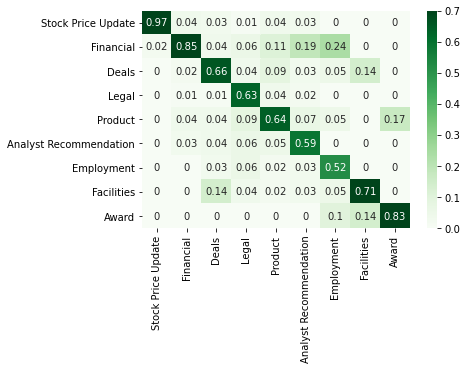

In [25]:
data = {'Stock Price Update': [9.74736842e-01,  1.54385965e-02, 7.01754386e-04, 7.01754386e-04, 2.10526316e-03, 4.21052632e-03, 1.40350877e-03, 0.00000000e+00, 7.01754386e-04],
        'Financial': [0.04294479,0.852760736196319, 0.01840491, 0.01226994, 0.04294479, 0.03067485, 0.,0.         ,0.    ],
        'Deals': [0.02816901 ,0.04225352, 0.66197183, 0.01408451, 0.04225352, 0.04225352, 0.02816901,0.14084507, 0.        ],
        'Legal': [0.01492537 ,      0.05970149, 0.04477612, 0.62686567, 0.08955224, 0.05970149, 0.05970149, 0.04477612, 0.   ],
        'Product': [0.03571429,  0.10714286, 0.08928571, 0.03571429, 0.64285714, 0.05357143, 0.01785714, 0.01785714, 0.   ],
        'Analyst Recommendation': [0.03389831,       0.18644068, 0.03389831, 0.01694915, 0.06779661, 0.59322034, 0.03389831, 0.03389831, 0.],
        'Employment': [0.     , 0.23809524,     0.04761905 , 0.   ,      0.04761905, 0.    ,     0.52380952, 0.04761905, 0.0952381],
        'Facilities': [0.   , 0.       ,       0.14285714, 0.   ,      0.    ,     0.     ,    0., 0.71428571 , 0.14285714  ],
        'Award': [0.    , 0.        ,      0.      ,   0.    ,     0.16666667 , 0.      ,   0., 0.      ,   0.83333333]}


index=['Stock Price Update', 'Financial', 'Deals', 'Legal', 'Product', 'Analyst Recommendation', 'Employment', 'Facilities', 'Award']
df = pd.DataFrame(data, index=index)
#df['Sum']=df.sum()
#df.set_index(index, inplace=True)
#print(df)
plt.figure()
sns.heatmap(df.round(2), annot=True, vmax=0.7, cmap='Greens')
plt.show()